In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import itertools
import warnings
warnings.filterwarnings("ignore")

In [116]:
df=pd.read_csv("D:\\Electric_Production.csv",parse_dates=['date'],index_col='date')

In [117]:
df.head()

,Bill
date,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


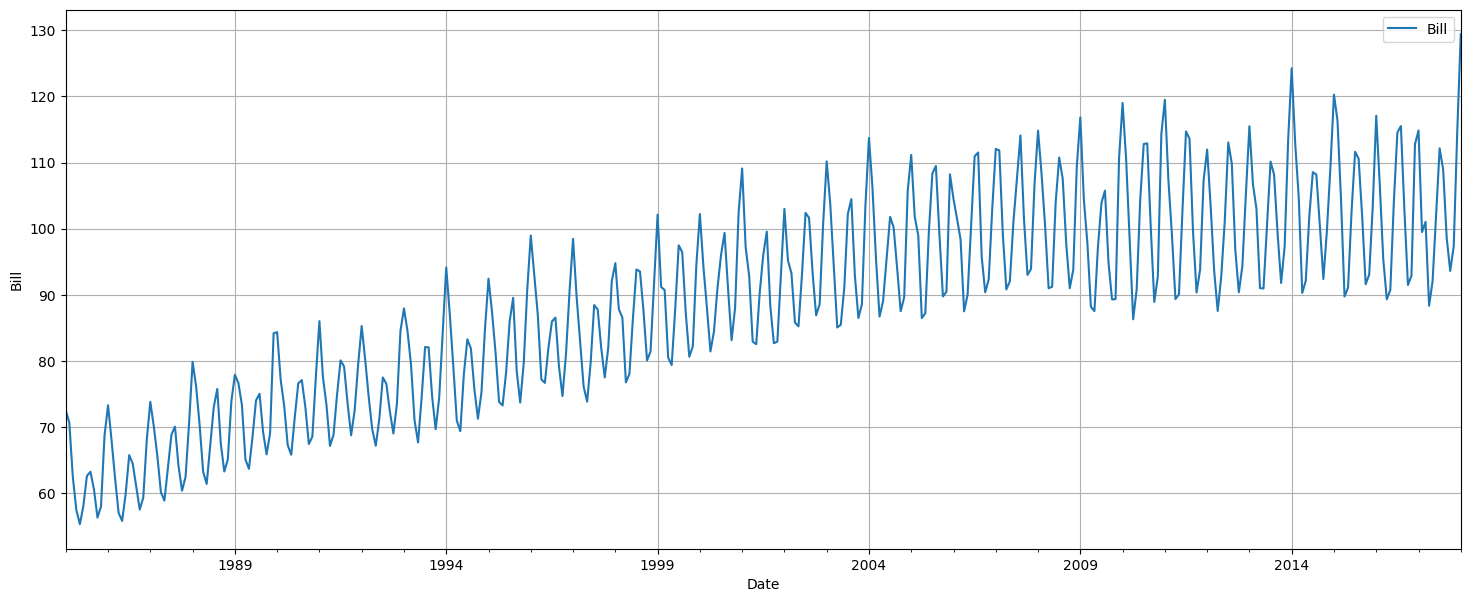

In [118]:
df.plot(figsize=(18,7))
plt.xlabel("Date")
plt.ylabel("Bill")
plt.grid()
plt.show()

In [119]:
train=df[:len(df)*80//100]

In [120]:
train.tail()

,Bill
date,
2011-01-01,119.4880
2011-02-01,107.3753
2011-03-01,99.1028
2011-04-01,89.3583
2011-05-01,90.0698


In [121]:
test=df[len(df)*80//100:]

In [122]:
test.head()

,Bill
date,
2011-06-01,102.8204
2011-07-01,114.7068
2011-08-01,113.5958
2011-09-01,99.4712
2011-10-01,90.3566


In [129]:
test.tail()

,Bill
date,
2017-09-01,98.6154
2017-10-01,93.6137
2017-11-01,97.3359
2017-12-01,114.7212
2018-01-01,129.4048


In [123]:
adfuller(train)

(-1.738695011787514,
 0.41129393445577456,
 15,
 301,
 {'1%': -3.452263435801039,
  '5%': -2.871190526189069,
  '10%': -2.571911967527952},
 1401.7831544268493)

In [124]:
model=sm.tsa.statespace.SARIMAX(train,order=(1,1,1),seasonal_order=(0,1,1,12))

In [125]:
result=model.fit()

In [126]:
print(result.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5059      0.058      8.719      0.000       0.392       0.620
ma.L1         -0.9540      0.020    -47.439      0.000      -0.993      -0.915
ma.S.L12      -0.7054      0.046    -15.282      0.000      -0.796      -0.615
sigma2         4.7970      0.303     15.837      0.000       4.203       5.391


In [144]:
from sklearn.metrics import mean_squared_error

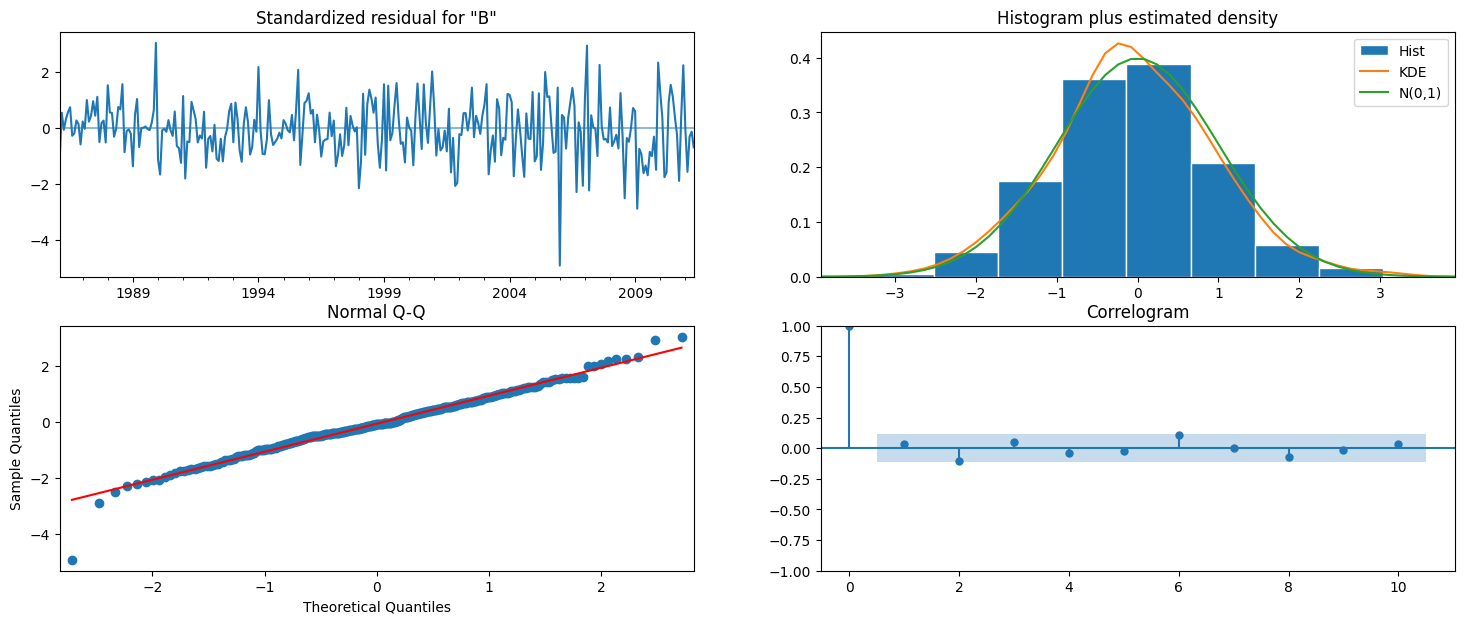

In [127]:
result.plot_diagnostics(figsize=(18,7))
plt.show()

In [128]:
final_predict=result.predict(start=test.index[0],end=test.index[-1])

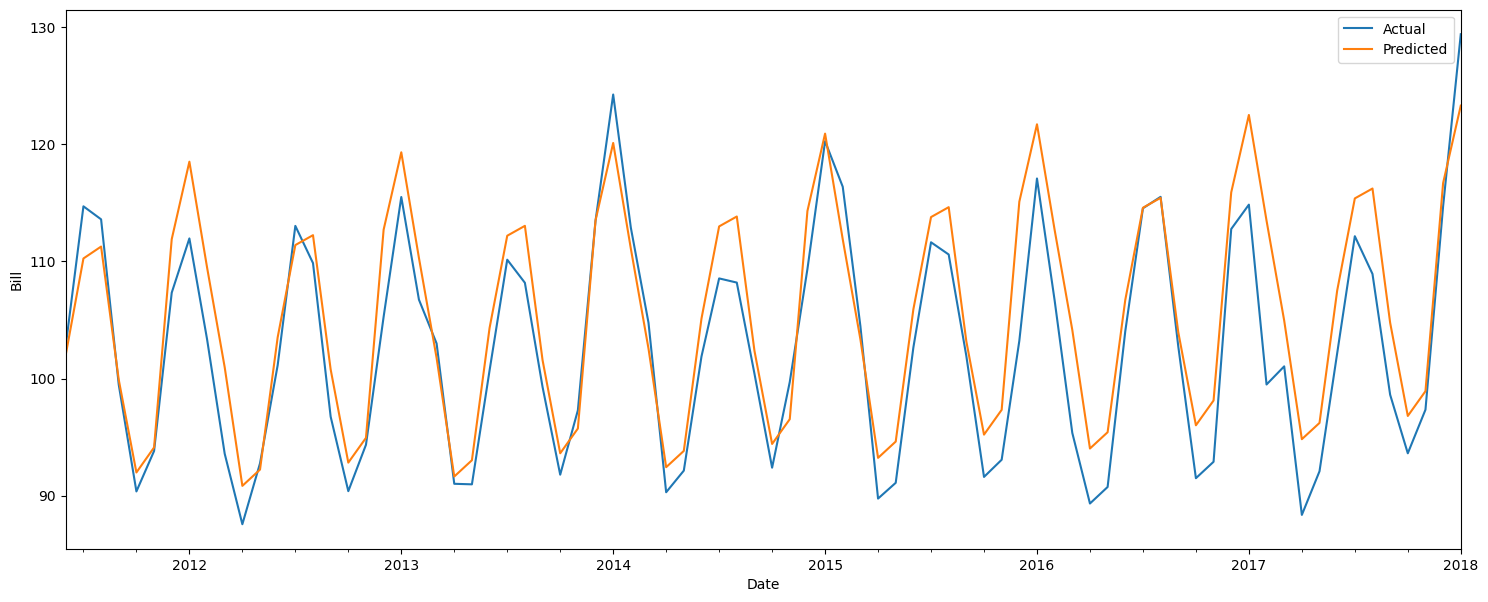

In [139]:
ax=df["2011-06-01":"2018-01-01"].plot(label="Actual")
final_predict.plot(ax=ax,label="Predicted",figsize=(18,7))
plt.xlabel("Date")
plt.ylabel("Bill")
plt.legend(["Actual","Predicted"])
plt.show()

In [145]:
np.sqrt(mean_squared_error(test,final_predict))

4.358577495151723

In [131]:
future=pd.DataFrame(pd.date_range("2018-01-02","2019-01-01"),columns=['date'])

In [132]:
future

,date
0,2018-01-02
1,2018-01-03
2,2018-01-04
3,2018-01-05
4,2018-01-06
...,...
360,2018-12-28
361,2018-12-29
362,2018-12-30
363,2018-12-31


In [133]:
future.set_index('date',inplace=True)

In [134]:
future

""
date
2018-01-02
2018-01-03
2018-01-04
2018-01-05
2018-01-06
...
2018-12-28
2018-12-29
2018-12-30


In [136]:
Forecast=result.predict(start=future.index[0],end=future.index[-1])

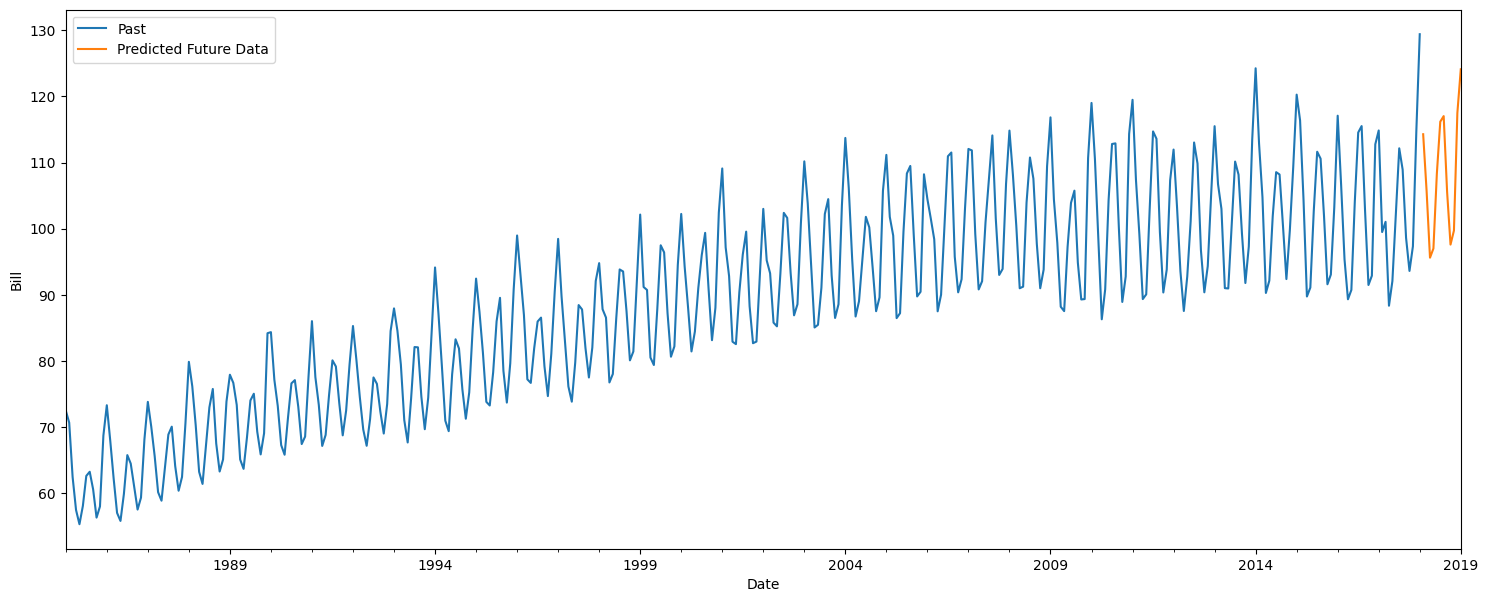

In [140]:
ax=df.plot(label="Past Data")
Forecast.plot(ax=ax,label="Predicted Future data",figsize=(18,7))
plt.xlabel("Date")
plt.ylabel("Bill")
plt.legend(["Past","Predicted Future Data"])
plt.show()